# 3강 데이터 핸들링 | 데이터 시각화 | 데이터 군집화
지난 시간에는 Requests와 BeautifulSoup / Selenium을 활용하여 데이터 수집을 해보았습니다.<br>
이번 시간에는 수집된 결과물을 전처리하고 데이터 군집화를 해보도록 하겠습니다.<br>
<br>
**3주차 학습 목표**
1. Pandas를 이용한 데이터프레임 핸들링
2. Matplotlib과 Seaborn을 이용한 데이터 시각화
3. Scikit-learn을 활용한 군집화(Clustering)

In [1]:
# 한글 폰트 설치
# 이 셀을 실행시키고 '런타임 > 런타임 다시 시작'을 해주세요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120828 files and direc

## 포켓몬 도감 크롤링
이번주에는 **포켓몬 도감**에서 능력치를 가져와 비지도 학습으로 **군집화**를 해보도록 하겠습니다.<br>
이번에는 표를 가지고 오는데, Pandas를 이용해 쉽게 가지고 오는 방법을 설명드리겠습니다.<br>

1. 영문 포켓몬 도감 가지고 오기
2. 한글 포켓몬 도감 가지고 오기
3. 영문 - 한글 포켓몬 도감 병합하기



In [1]:
# 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [2]:
def get_soup(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')

    return soup

In [3]:
# BeautifulSoup으로 영문 포켓몬 도감 수집
url = 'https://pokemondb.net/pokedex/all'
soup = get_soup(url)

In [ ]:
# 표 태그 찾기
html_table = soup.find('table') # 표는 보통 table 태그로 구성되어 있고, 그 아래 tr / td 등의 데이터로 이루어져 있습니다.
print(html_table)

In [5]:
# 표를 데이터 프레임으로 바로 가지고 오기
html_table = str(html_table) # html_table은 soup의 데이터로 되어 있기 때문에 문자열 데이터로 변경해주어야 합니다.
en_df = pd.read_html(html_table)[0] # 표를 리스트 형태로 반환하기 때문에 인덱싱을 해줘야 합니다.

In [6]:
en_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1189,1006,Iron Valiant,Fairy Fighting,590,74,130,90,120,60,116
1190,1007,Koraidon,Fighting Dragon,670,100,135,115,85,100,135
1191,1008,Miraidon,Electric Dragon,670,100,85,100,135,115,135
1192,1009,Walking Wake,Water Dragon,590,99,83,91,125,83,109


In [7]:
# 한글 포켓몬 도감 수집
url = 'https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90'
soup = get_soup(url)

In [8]:
# 한글 포켓몬 도감 데이터 프레임 생성
kr_df = pd.DataFrame()
for html_table in soup.find_all('table')[:-1]:
    kr_df_part = pd.read_html(str(html_table))[0]
    kr_df_part['지방'] = [re.sub('도감', '지방', kr_df_part.columns[0])]*len(kr_df_part)
    kr_df = pd.concat([kr_df, kr_df_part])

## 데이터 전처리

In [9]:
# 한글 포켓몬 도감 확인
kr_df

# 여기에서 어떤 데이터를 가지고 와야 할지 봅시다.

,관동도감,전국도감,아이콘,포켓몬,타입,타입.1,지방,성도도감,호연도감,신오도감,하나도감,센트럴/코스트/마운틴 칼로스도감,알로라도감,가라르도감,히스이도감,팔데아도감
0,#001,#0001,NaN,이상해씨,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#002,#0002,NaN,이상해풀,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#003,#0003,NaN,이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,#0003,NaN,메가이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#004,#0004,NaN,파이리,불꽃,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,#1006,NaN,무쇠무인,페어리격투,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#398
102,NaN,#1007,NaN,코라이돈,격투드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#399
103,NaN,#1008,NaN,미라이돈,전기드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#400
104,NaN,#1009,NaN,굽이치는물결,물드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#000


### 컬럼 추출 | 중복값 제거 | 데이터 병합

In [10]:
# loc를 이용하여 특정 컬럼(또는 로우)를 추출하는 방법
kr_df.loc[:,['전국도감', '포켓몬', '지방']]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
101,#1006,무쇠무인,팔데아지방
102,#1007,코라이돈,팔데아지방
103,#1008,미라이돈,팔데아지방
104,#1009,굽이치는물결,팔데아지방


In [11]:
# 리스트 인덱싱을 통해 특정 컬럼만 추출하는 방법
kr_df = kr_df[['전국도감', '포켓몬', '지방']].copy(); kr_df

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
101,#1006,무쇠무인,팔데아지방
102,#1007,코라이돈,팔데아지방
103,#1008,미라이돈,팔데아지방
104,#1009,굽이치는물결,팔데아지방


In [12]:
# 병합을 위해 전국 도감 텍스트 전처리
kr_df['전국도감'] = kr_df['전국도감'].map(lambda x : int(re.sub('[^\w]', '', x))) # '#'을 빼고 001의 숫자는 정수 형태로 변경합니다.

# Warning 메시지가 발생하는 이유는 Pandas에서 데이터프레임의 일부분(실습 예제의 경우 '전국도감')을 변경하더라도 데이터프레임 원본이 변경되기 때문입니다.
# 하지만 저희는 의도적으로 일부분만 변경하려고 하는 것이기 때문에 큰 문제는 되지 않습니다.

In [13]:
kr_df[kr_df.duplicated(keep = False)]

,전국도감,포켓몬,지방
24,19,꼬렛,관동지방
25,19,꼬렛,관동지방
26,20,레트라,관동지방
27,20,레트라,관동지방
33,26,라이츄,관동지방
...,...,...,...
93,898,버드렉스,가라르지방
6,905,러브로스,히스이지방
7,905,러브로스,히스이지방
58,964,돌핀맨,팔데아지방


In [14]:
# 중복값 확인 및 제거
kr_df.drop_duplicates(subset = ['전국도감'], inplace = True) # 도감 번호를 키 값으로 변경하기 위해 중복값을 없애줍니다.

In [15]:
# 컬럼명 변경
kr_df.columns = ['#', 'Name', 'Region']; kr_df

,#,Name,Region
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
4,4,파이리,관동지방
5,5,리자드,관동지방
...,...,...,...
101,1006,무쇠무인,팔데아지방
102,1007,코라이돈,팔데아지방
103,1008,미라이돈,팔데아지방
104,1009,굽이치는물결,팔데아지방


In [16]:
# 데이터 병합
df = pd.merge(en_df, kr_df, on = '#', suffixes = ['_EN', '']); df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방
4,4,Charmander,Fire,309,39,52,43,60,50,65,파이리,관동지방
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1006,Iron Valiant,Fairy Fighting,590,74,130,90,120,60,116,무쇠무인,팔데아지방
1190,1007,Koraidon,Fighting Dragon,670,100,135,115,85,100,135,코라이돈,팔데아지방
1191,1008,Miraidon,Electric Dragon,670,100,85,100,135,115,135,미라이돈,팔데아지방
1192,1009,Walking Wake,Water Dragon,590,99,83,91,125,83,109,굽이치는물결,팔데아지방


### 데이터 정보 | 통계
만약 어떤 데이터를 처음 받았다면 구조를 알기 어렵습니다.<br>
컬럼별 데이터 타입을 확인하고, null 값이 있는지 확인하기 위해서는 데이터 정보 확인이 필수입니다.<br>
그리고 정형 데이터의 경우, 대략적인 통계량을 확인하는 것이 좋습니다.<br>
머신러닝 분석을 위해서 데이터 스케일을 조정해야 하는 경우가 있는데 이때 기초 통계량을 확인해둔다면 분석에 도움이 될 것입니다.

In [17]:
# null값과 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1194 non-null   int64 
 1   Name_EN  1194 non-null   object
 2   Type     1194 non-null   object
 3   Total    1194 non-null   int64 
 4   HP       1194 non-null   int64 
 5   Attack   1194 non-null   int64 
 6   Defense  1194 non-null   int64 
 7   Sp. Atk  1194 non-null   int64 
 8   Sp. Def  1194 non-null   int64 
 9   Speed    1194 non-null   int64 
 10  Name     1194 non-null   object
 11  Region   1194 non-null   object
dtypes: int64(8), object(4)
memory usage: 121.3+ KB


In [18]:
# 데이터 프레임의 간략한 통계
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


### 컬럼 연산

In [19]:
# 타입 분리하기
type_ = df['Type'].str.split() # 자주 쓰는 방법은 아니겠지만, 그래도 이렇게 할 수 있다 정도만 알아두세요.

In [20]:
# 타입 컬럼 추가
df['Type_1'] = type_.str[0]
df['Type_2'] = type_.str[1]

In [21]:
# 컬럼 연산
df['Physical'] = df['Attack'] + df['Defense']
df['Special'] = df['Sp. Atk'] + df['Sp. Def']

In [22]:
# .apply를 활용한 컬럼 연산
df.apply(lambda x : x['Attack'] + x['Defense'], axis = 1)

0        98
1       125
2       165
3       223
4        95
       ... 
1189    220
1190    250
1191    185
1192    174
1193    218
Length: 1194, dtype: int64

In [33]:
# df 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1193
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   #         1194 non-null   int64 
 1   Name_EN   1194 non-null   object
 2   Type      1194 non-null   object
 3   Total     1194 non-null   int64 
 4   HP        1194 non-null   int64 
 5   Attack    1194 non-null   int64 
 6   Defense   1194 non-null   int64 
 7   Sp. Atk   1194 non-null   int64 
 8   Sp. Def   1194 non-null   int64 
 9   Speed     1194 non-null   int64 
 10  Name      1194 non-null   object
 11  Region    1194 non-null   object
 12  Type_1    1194 non-null   object
 13  Type_2    652 non-null    object
 14  Physical  1194 non-null   int64 
 15  Special   1194 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 158.6+ KB
None


In [36]:
# 중복값 확인
df[df.duplicated(subset = ['#'], keep = False)]

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region,Type_1,Type_2,Physical,Special
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방,Grass,Poison,165,200
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방,Grass,Poison,223,242
6,6,Charizard,Fire Flying,534,78,84,78,109,85,100,리자몽,관동지방,Fire,Flying,162,194
7,6,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100,리자몽,관동지방,Fire,Dragon,241,215
8,6,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100,리자몽,관동지방,Fire,Flying,182,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,978,Tatsugiri Stretchy Form,Dragon Water,475,68,50,60,120,95,82,싸리용,팔데아지방,Dragon,Water,110,215
1163,982,Dudunsparce Two-Segment Form,Normal,520,125,100,80,85,75,55,노고고치,팔데아지방,Normal,NaN,180,160
1164,982,Dudunsparce Three-Segment Form,Normal,520,125,100,80,85,75,55,노고고치,팔데아지방,Normal,NaN,180,160
1181,999,Gimmighoul Chest Form,Ghost,300,45,30,70,75,70,10,모으령,팔데아지방,Ghost,NaN,100,145


## 데이터 시각화
이제 Matplotlib과 Seaborn을 활용한 데이터 시각화를 해보도록 하겠습니다.<br>
보통은 Matplotlib을 활용해서 시각화를 하는 경우가 많은데 Pandas 데이터프레임을 활용하는 경우 Seaborn을 쓰는 게 편합니다.<br>
그런데 사실 Seaborn은 Matplotlib 위에서 동작하기 때문에 둘 다 알아두시면 좋아요.

In [24]:
# 기본적으로 필요한 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 시각화 설정

# Seaborn에서 기본 스타일을 지정할 수 있습니다.
sns.set_style('whitegrid')
# 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 가장 위 코드가 바로 한글 폰트를 다운로드 받는 코드입니다.

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# font 설정
rc('font',family=font_name) # Colab에 기본적으로 한글 폰트가 없어서 한글 폰트를 설정해주어야 합니다.
rcParams['axes.unicode_minus'] = False # 마이너스 부호가 표시되지 않는 오류가 발생하기도 해서 미리 설정해주시는 게 좋습니다.

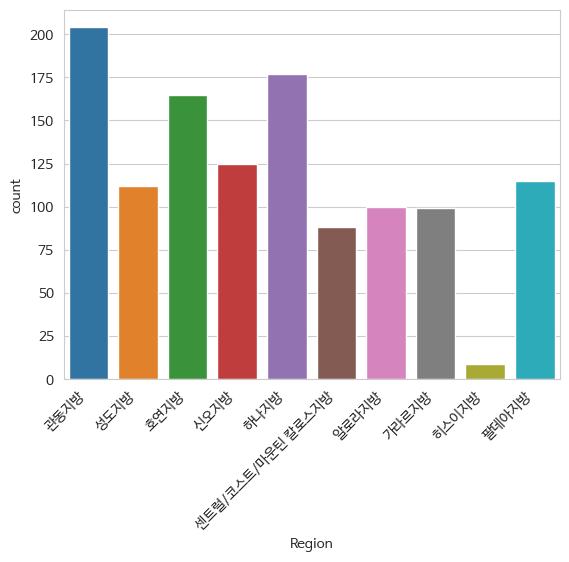

In [26]:
# Countplot | 지방별 포켓몬 수 시각화
plt.figure(dpi=100) # 해상도 설정
plt.xticks(rotation=45, ha = 'right') # 45도 돌리고 오른쪽 맞춤
sns.countplot(x = 'Region', data = df) # data를 df로 지정했다면, df의 컬럼명을 넣는 것만으로 쉽게 시각화가 가능합니다.
plt.show()

In [27]:
# 고윳값 추출
# 타입별 카운트를 알아보기 위해 고윳값을 추출합니다.

type_list = list(df['Type_1'].unique())
print(type_list)

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']


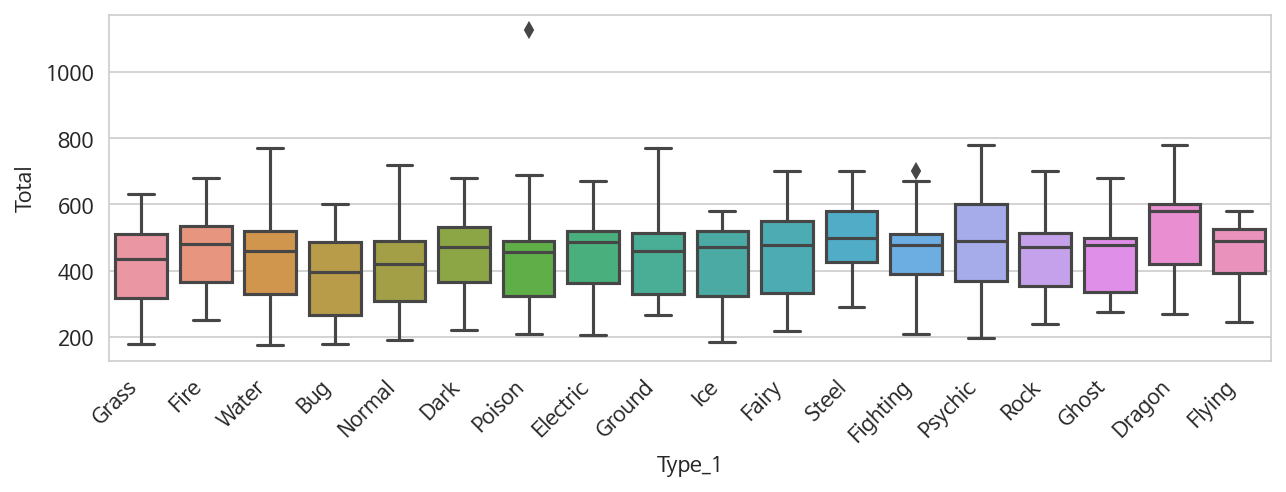

In [28]:
# Boxplot | 타입_1별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_1', y = 'Total', data = df, order = type_list)
plt.show()

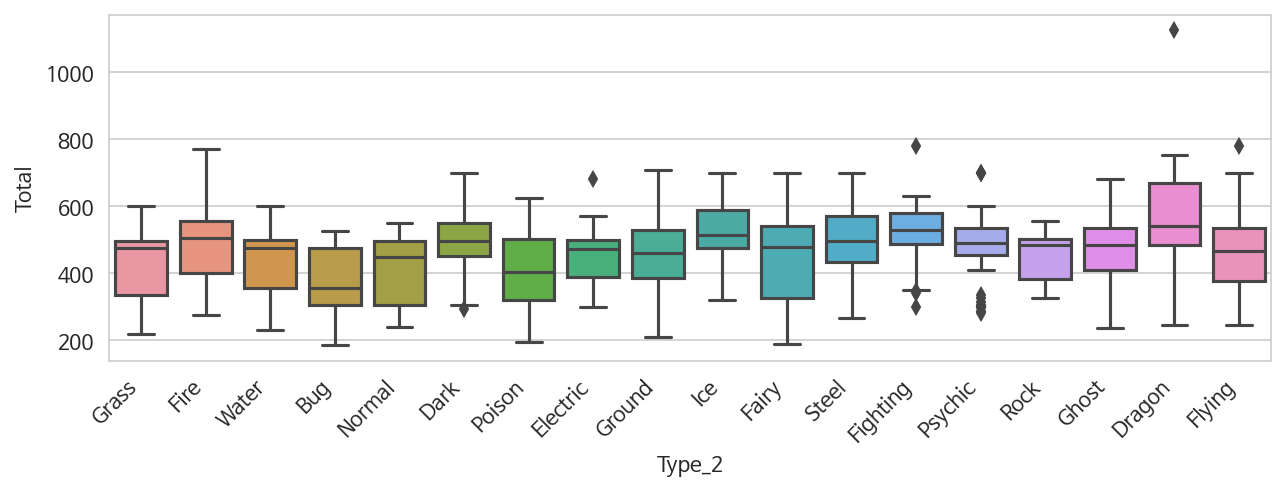

In [29]:
# Boxplot | 타입_2별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150)
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_2', y = 'Total', data = df, order = type_list)
plt.show()

### EDA를 왜 할까?
단순히 숫자만으로는 파악하기 어려운 데이터간의 분포를 확인하기 위해 EDA를 진행합니다.<br>
EDA를 진행하기 전에 해당 데이터와 관련된 도메인 지식이 필요할 수 있습니다.<br>
<br>
개인적인 의견을 조금 밝히자면, 데이터 분석과 관련된 코드는 이제 ChatGPT를 비롯한 코드 생성 모델이 더 잘 만들어낼 수 있습니다. 그렇다면 그 속에서 데이터 분석가는 무엇을 할 수 있을까요?
머신러닝을 활용하는 데이터 분석가의 역량은 결국 얼마나 깊이 있게 데이터를 해석하고 분석 방법을 정교하게 하느냐에 달려 있다고 생각합니다. 결국, 해당 **데이터를 수집한 방법**부터 **수집한 데이터의 일반적인 특성**, **도메인에 따라 유도할 수 있는 결과** 등을 분석가가 제대로 파악하고 있어야 그에 알맞은 분석 도구들을 활용할 수 있습니다.<br>
<br>
이번 실습에서는 이론적인 부분을 차치하고 분석 도구를 활용하는 데 목적을 두고 있습니다.<br>
하지만 실무에서는 여러분들만의 가설을 세우고 그 가설을 지속적으로 검증하는 과정이 될 것입니다.

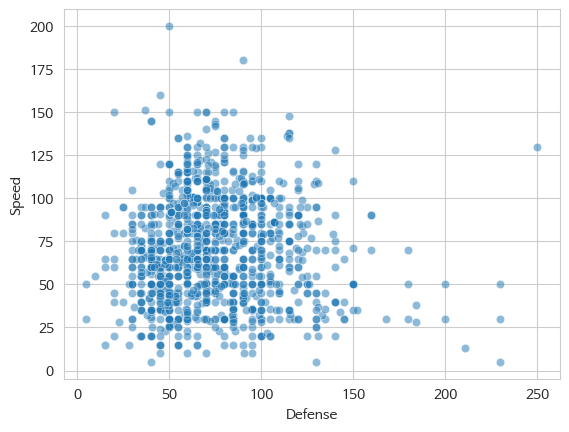

In [30]:
# Scatterplot | 두 개의 연속형 데이터의 분포
plt.figure(dpi=100)
sns.scatterplot(x = 'Defense', y ='Speed', alpha = 0.5, data = df)
plt.show()

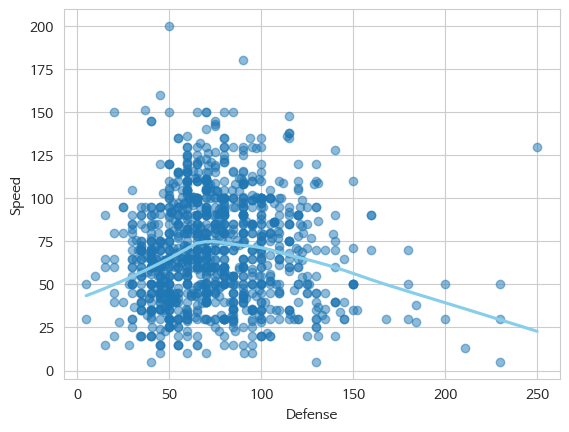

In [32]:
# Regplot | Scatterplot + Regression Line
plt.figure(dpi=100)
sns.regplot(x = 'Defense', y ='Speed', lowess = True,
            scatter_kws={'alpha':0.5},
            line_kws = {'color': 'skyblue'},
            data = df)
plt.show()

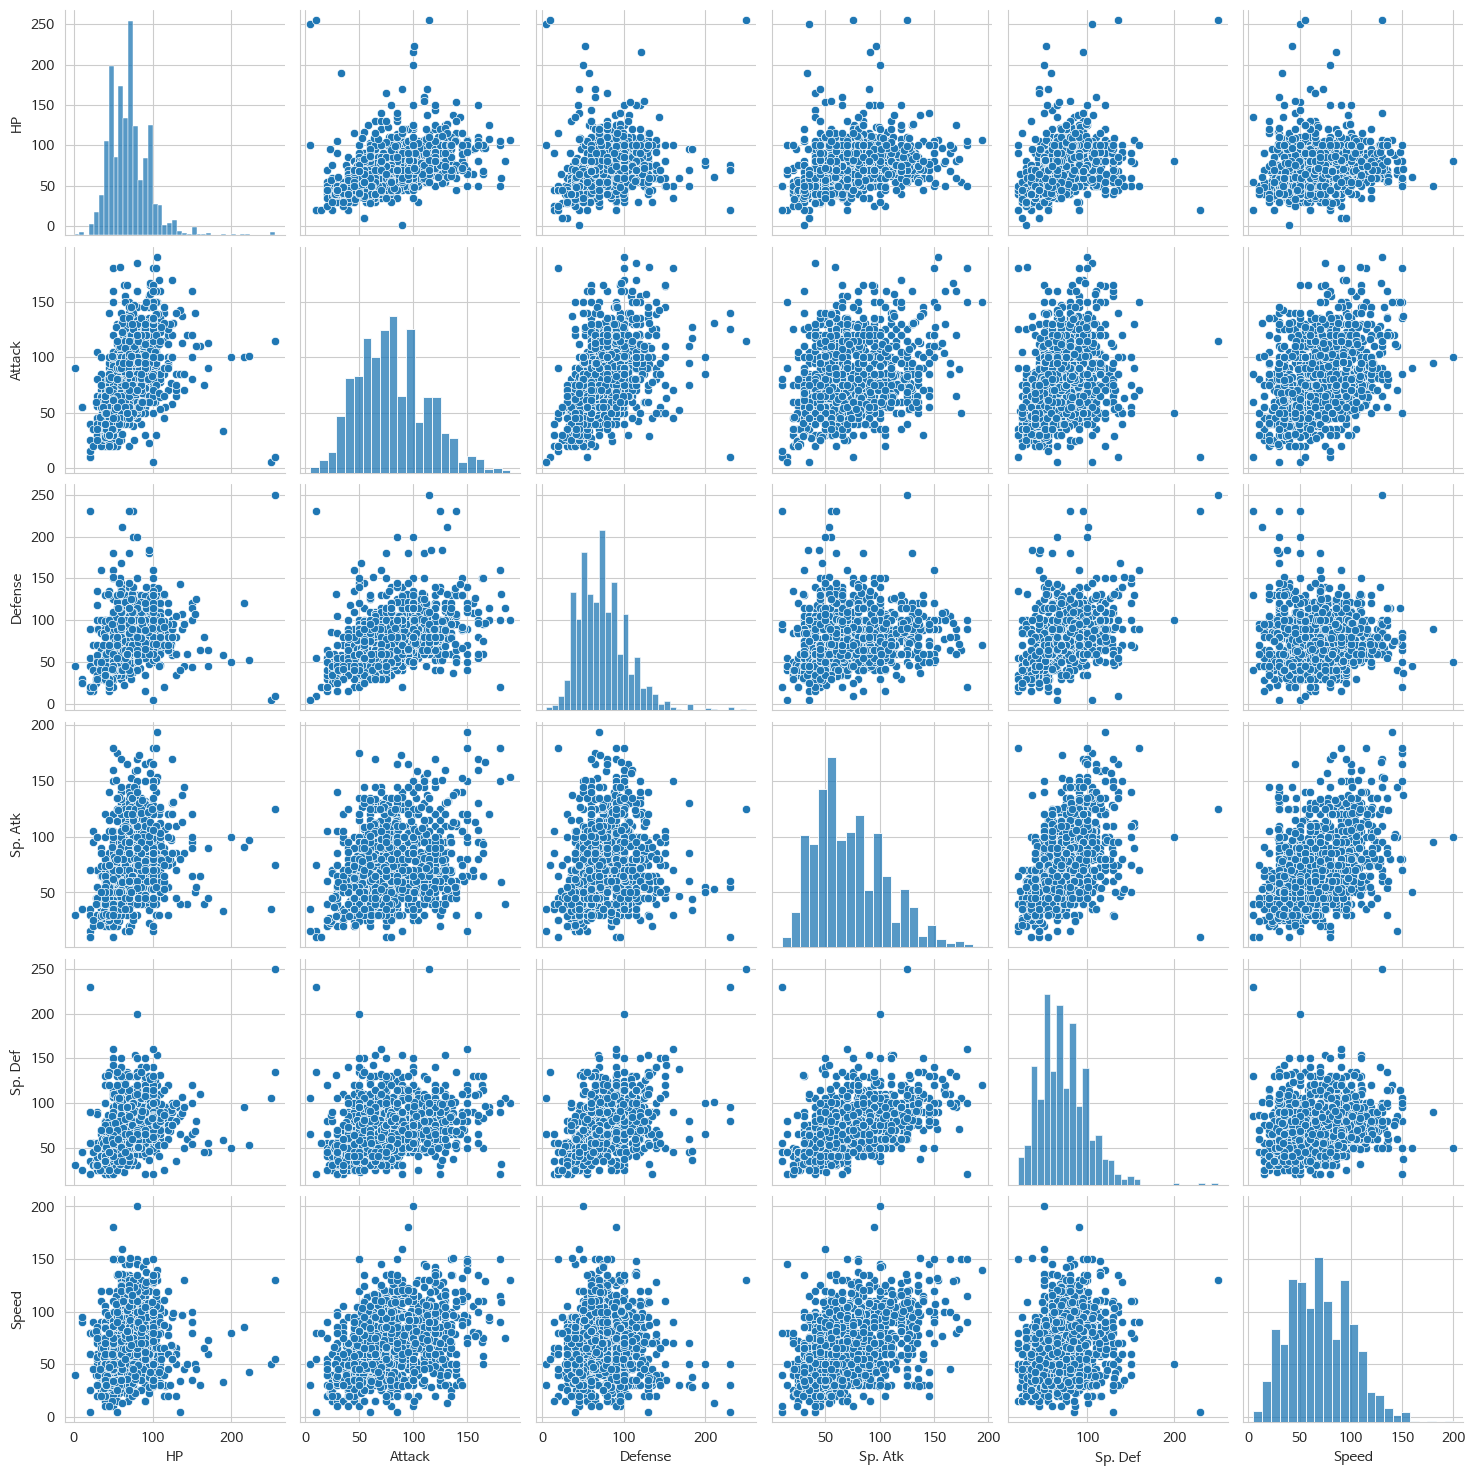

In [39]:
# Pairplot | 모든 연속형 데이터의 Scatterplot과 히스토그램을 보고 싶을 때
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()

In [40]:
# 인덱스를 활용한 컬럼(또는 로우) 추출
df.iloc[:,4:9]

,HP,Attack,Defense,Sp. Atk,Sp. Def
0,45,49,49,65,65
1,60,62,63,80,80
2,80,82,83,100,100
3,80,100,123,122,120
4,39,52,43,60,50
...,...,...,...,...,...
1189,74,130,90,120,60
1190,100,135,115,85,100
1191,100,85,100,135,115
1192,99,83,91,125,83


## 데이터 군집화
Clustering이라고도 불리는 군집화는 대표적인 **비지도 학습 기법** 중에 하나입니다.<br>
포켓몬을 능력치에 따라 구분한다고 하더라도 어떤 기준에 따라 군집화해야 할지 모를 수 있습니다.<br> 비지도 학습은 우리가 정답을 알지 못하더라도, 통계적인 기법을 통해 군집을 나눌 수 있도록 도와줍니다.<br>
물론, 비지도 학습의 특성상 정해진 답이 없기 때문에 최적의 값을 찾기 위한 시행착오가 있을 수 있습니다.

### 차원 축소 모델 (2차원 투영)
보통 하나의 컬럼 당 하나의 차원을 이룹니다.<br>
쉽게 생각해보면 X축과 Y축이 보통 우리가 생각하는 2차원인데요, 여기에 Z축이 포함된다면 3차원이라고 부르지요. 이처럼 하나의 축이 차원이라고 보시면 됩니다.<br>
하지만 군집화를 위해서는 우선 2차원 평면으로 투영(Projection)해야 합니다. 정보의 손실을 최소화하면서 2차원 값을 추출하는 방법으로는 PCA와 t-SNE가 있습니다. 자세한 설명은 생략하고 오늘은 코드만 구현해보겠습니다.

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
result_pca = pca.fit_transform(df.iloc[:,3:9])
df[['X', 'Y']] = result_pca

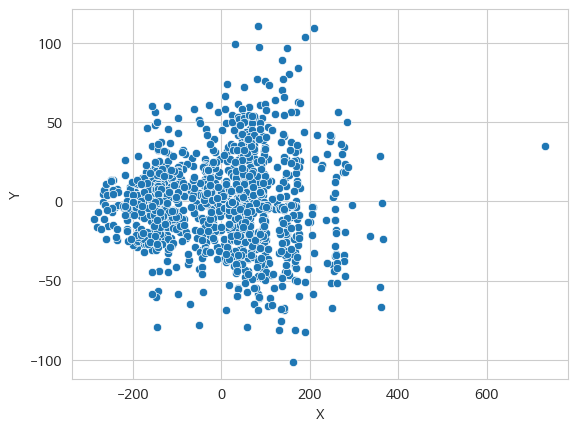

In [42]:
# PCA 차원 축소 결과
sns.scatterplot(x = 'X', y = 'Y', data = df)
plt.show()

In [43]:
tsne = TSNE(n_components=2, learning_rate = 1000, random_state = 319)
result_tsne = tsne.fit_transform(df.iloc[:,3:9])
df[['X', 'Y']] = result_tsne

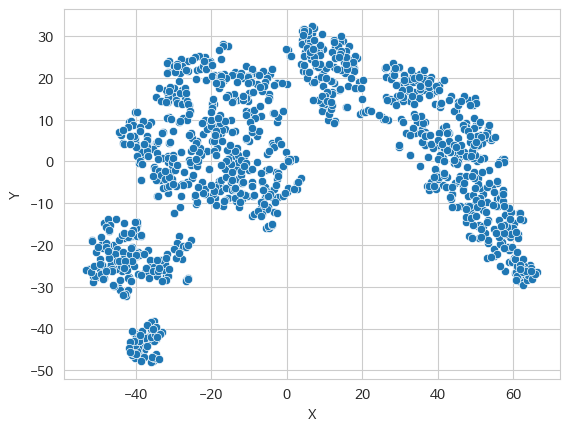

In [44]:
# t-SNE 차원 축소 결과
sns.scatterplot(x = 'X', y = 'Y', data = df)
plt.show()

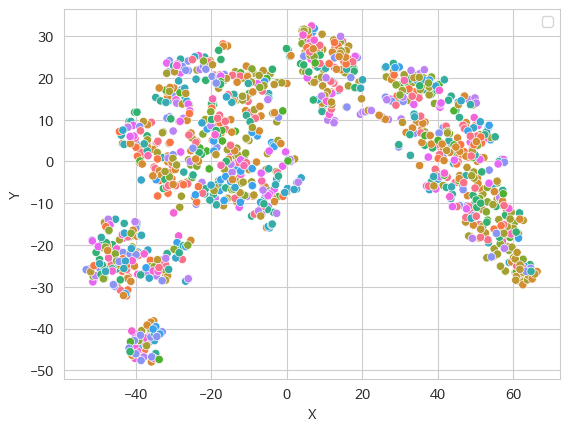

In [81]:
# 포켓몬 타입과 군집의 상관 관계가 있을까?
sns.scatterplot(x = 'X', y = 'Y', data = df, hue = 'Type_1')
plt.legend('')
plt.show()

### 데이터 군집화 모델

In [46]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [65]:
# DBSCAN 모델
cluster = DBSCAN(eps = 3.5) # epsilon 값을 변경하면서 최적의 군집 분포를 도출합니다.
label = cluster.fit_predict(df[['X', 'Y']])
df['Cluster'] = label

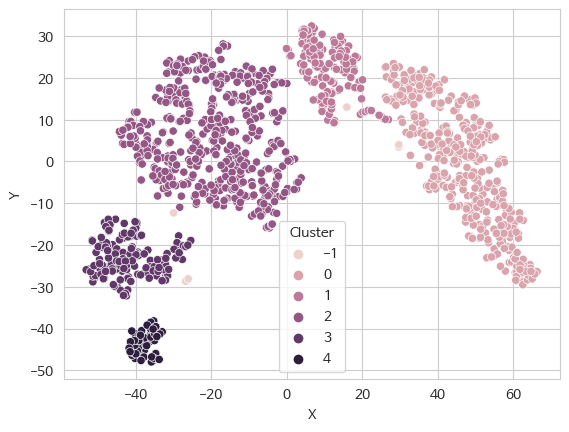

In [66]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster', data = df)
plt.show()

In [67]:
# KMeans 모델
kmeans = KMeans(n_clusters = 8, n_init = 10, random_state=319) # 클러스터 개수를 지정하여 최적의 군집을 찾습니다.
label = kmeans.fit_predict(df[['X', 'Y']])
df['Cluster'] = label

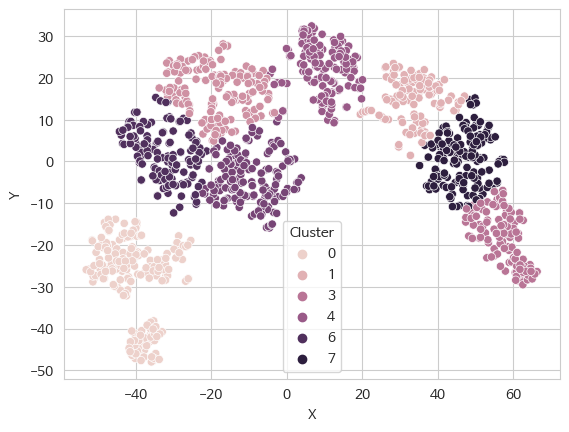

In [68]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster', data = df)
plt.show()

In [69]:
# 클러스터에 어떤 포켓몬이 포함되어 있을까?
cluster = 3
df[df['Cluster'] == cluster][['Name','Total']]

,Name,Total
13,캐터피,195
14,단데기,205
16,뿔충이,195
17,딱충이,205
20,구구,251
...,...,...
1122,땃쭈르,290
1124,그푸리,275
1131,구르데,270
1133,하느라기,255


### 분포별 박스플롯 시각화를 위한 데이터 조작

In [70]:
# 추출하고자 하는 컬럼명
cols = list(df.iloc[:,4:9].columns); print(cols)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']


In [71]:
# 추출하고자 하는 컬럼명 추가
cols.extend(['Physical', 'Special', 'Cluster']); print(cols)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Physical', 'Special', 'Cluster']


In [72]:
# 데이터 재구조화 (pd.melt)
tmp = pd.melt(df, id_vars = ['#', 'Cluster'], value_vars = cols, var_name = 'Stats', value_name = 'Value')

In [73]:
# 클러스터 확인
cluster = 3
tmp[tmp['Cluster'] == cluster]

,#,Cluster,Stats,Value
13,10,3,HP,45
14,11,3,HP,50
16,13,3,HP,40
17,14,3,HP,45
20,16,3,HP,40
...,...,...,...,...
8286,944,3,Special,75
8288,946,3,Special,80
8295,953,3,Special,89
8297,955,3,Special,85


In [74]:
# 클러스터별 포켓몬 수 카운트
tmp.groupby('Cluster')['#'].count() / len(tmp.Stats.unique())

Cluster
0    201.0
1    115.0
2    162.0
3    123.0
4    143.0
5    155.0
6    141.0
7    154.0
Name: #, dtype: float64

In [75]:
# 클러스터별 능력치 평균
tmp.groupby('Cluster')['Value'].mean()

Cluster
0    135.449183
1     75.426087
2    101.583774
3     50.976771
4     89.116883
5    108.750230
6    114.579534
7     66.470315
Name: Value, dtype: float64

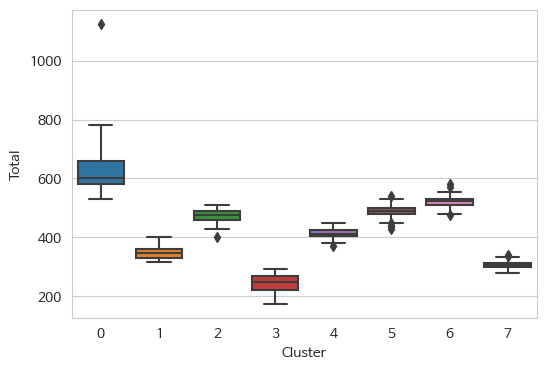

In [76]:
# 클러스터별 박스플롯
plt.figure(figsize = (6,4),dpi = 100)
sns.boxplot(data = df, x = 'Cluster', y = 'Total')
plt.show()

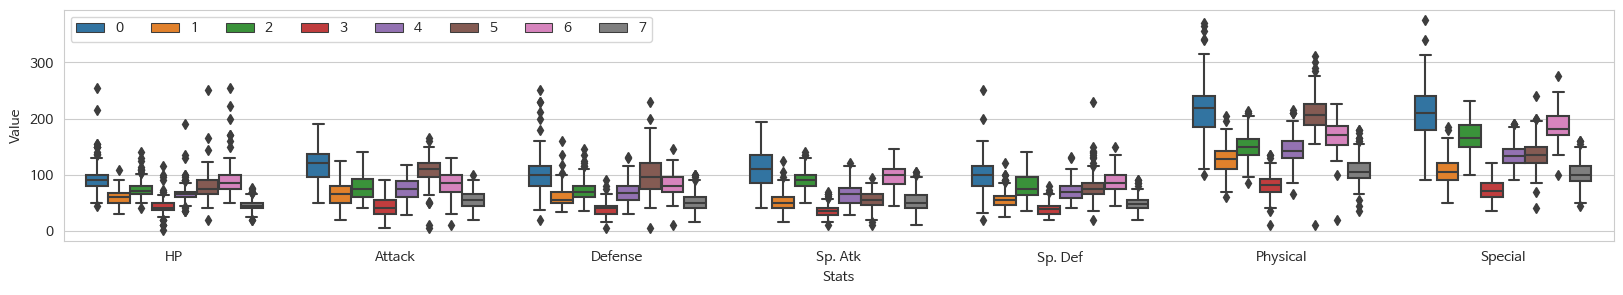

In [77]:
# 클러스터별 세부 능력치 박스플롯
plt.figure(figsize = (20,3),dpi = 100)
sns.boxplot(data = tmp, x = 'Stats', y = 'Value', hue = 'Cluster')

plt.legend(ncol = 8)
plt.show()